# TD Réseau Sémantique

## **Réalisé par : Nassima RHANNOUCH**
## **Classe : IID3**

# Exercice 1 : Réseau sémantique Oiseau / Mammifère / Chauve-souris

**Énoncé :**  
On dispose des faits suivants :  
- Un oiseau est un animal qui peut voler.  
- Un mammifère est un animal qui allaite ses petits.  
- Une chauve-souris est à la fois un mammifère et un oiseau.  
- Les chauves-souris ne pondent pas d’œufs.  

**Questions :**  
1. Construisez le réseau sémantique.  
2. Quelles propriétés la chauve-souris hérite-t-elle ?  
3. Quels conflits apparaissent ?

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
def afficher_reseau(G, titre="Réseau Sémantique"):
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 6))
    nx.draw(
        G, pos, with_labels=True,
        node_color='lightblue', node_size=2500,
        font_size=10, font_weight='bold', arrows=True
    )
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=9)
    plt.title(titre, fontsize=14)
    plt.axis("off")
    plt.show()

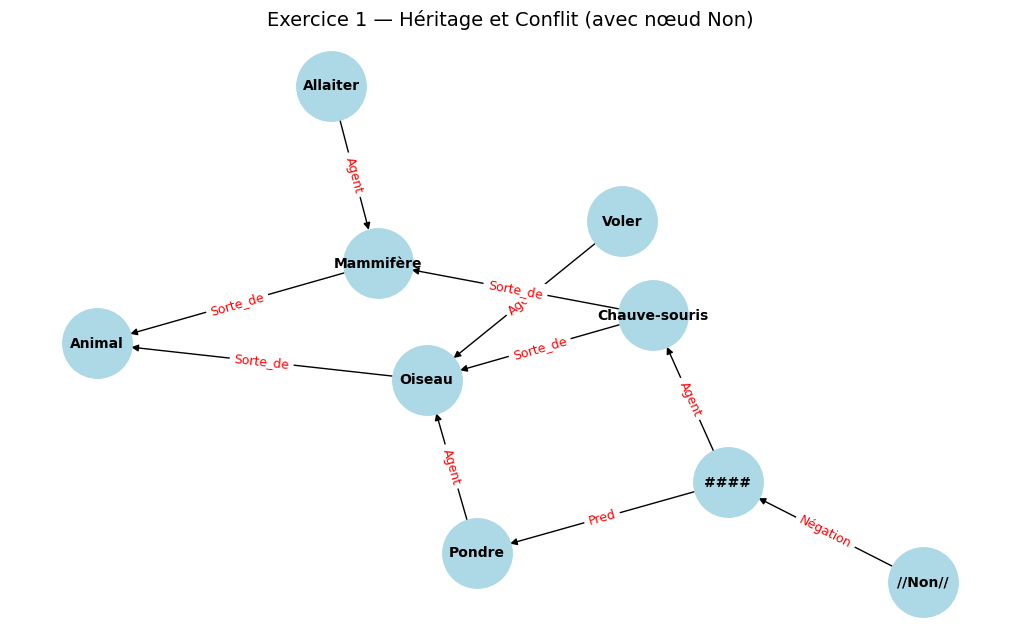

In [39]:
G44 = nx.DiGraph()

edges1 = [
    ("Voler", "Oiseau", "Agent"),
    ("Pondre", "Oiseau", "Agent"),
    ("Oiseau", "Animal", "Sorte_de"),
    ("Mammifère", "Animal", "Sorte_de"),
    ("Allaiter", "Mammifère", "Agent"),
    ("Chauve-souris", "Mammifère", "Sorte_de"),
    ("Chauve-souris", "Oiseau", "Sorte_de"),

    ("####", "Chauve-souris", "Agent"),
    ("####", "Pondre", "Pred"),
    ("//Non//", "####", "Négation")
]

for s, d, r in edges1:
    G44.add_edge(s, d, relation=r)

afficher_reseau(G44, "Exercice 1 — Héritage et Conflit (avec nœud Non)")


# Exercice 2 : Propagation d’héritage - Dauphins

**Énoncé :**  
On a les règles suivantes :  
- Tous les poissons vivent dans l’eau.  
- Tous les animaux qui vivent dans l’eau peuvent nager.  
- Les dauphins sont des mammifères.  
- Les mammifères sont des animaux.  
- Les dauphins vivent dans l’eau.  

**Objectif :**  
En utilisant uniquement le réseau sémantique et la propagation d’héritage, démontrez que les dauphins peuvent nager.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27696\1118100539.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


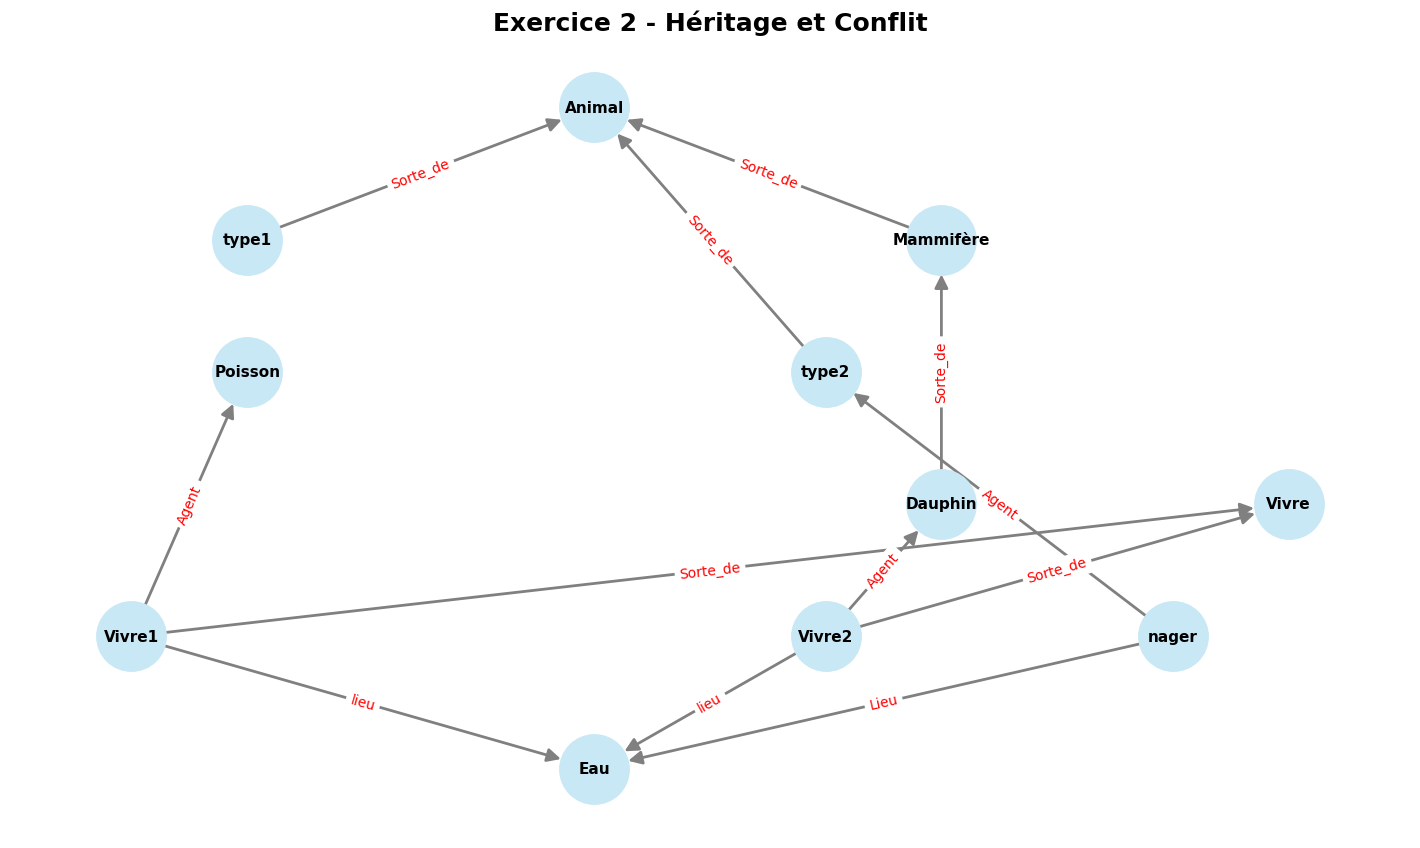

In [ ]:
def layout_G55(G):
    pos = {}
    pos["Animal"] = (0, 3)
    pos["Mammifère"] = (3, 2)
    pos["type1"] = (-3, 2)
    pos["type2"] = (2, 1)

    pos["Poisson"] = (-3, 1)
    pos["Dauphin"] = (3, 0)

    pos["Vivre1"] = (-4, -1)
    pos["Vivre2"] = (2, -1)
    pos["nager"] = (5, -1)

    pos["Eau"] = (0, -2)
    pos["Vivre"] = (6, 0)

    return pos
def afficher_reseau_G55(G, titre):
    plt.figure(figsize=(14, 8))

    pos = layout_G55(G)

    nx.draw(
        G, pos,
        with_labels=True,
        node_color="#C9E8F5",
        node_size=2500,
        font_size=11,
        font_weight="bold",
        edge_color="gray",
        arrows=True,
        arrowsize=20,
        width=2
    )

    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color="red",
        font_size=10
    )

    plt.title(titre, fontsize=18, fontweight="bold")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

G55 = nx.DiGraph()
edges1 = [
    ("Vivre1", "Eau", "lieu"),
    ("Vivre1", "Vivre", "Sorte_de"),
    ("Vivre1", "Poisson", "Agent"),
    ("type1", "Animal", "Sorte_de"),
    ("type2", "Animal", "Sorte_de"),
    ("Dauphin", "Mammifère", "Sorte_de"),
    ("Vivre2", "Dauphin", "Agent"),
    ("Vivre2", "Eau", "lieu"),
    ("Vivre2", "Vivre", "Sorte_de"),
    ("nager", "type2", "Agent"),
    ("nager", "Eau", "Lieu"),
    ("Mammifère", "Animal", "Sorte_de"),
]

for s, d, r in edges1:
    G55.add_edge(s, d, relation=r)

afficher_reseau_G55(G55, "Exercice 2 - Héritage et Conflit")


# Exercice 3 : Réseau sémantique Personne / Étudiant / Enseignant / Professeur

**Énoncé :**  
On veut représenter :  
- Une personne possède un âge (valeur numérique).  
- Un étudiant est une personne qui étudie un domaine.  
- Un enseignant est une personne qui enseigne un domaine.  
- Un professeur est à la fois enseignant et chercheur.  
- Le domaine enseigné doit être le même que le domaine étudié pour un même cours.  

**Questions :**  
1. Construisez le réseau (nœuds, liens, types).  
2. Identifiez le type de contrainte.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27696\3478013809.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


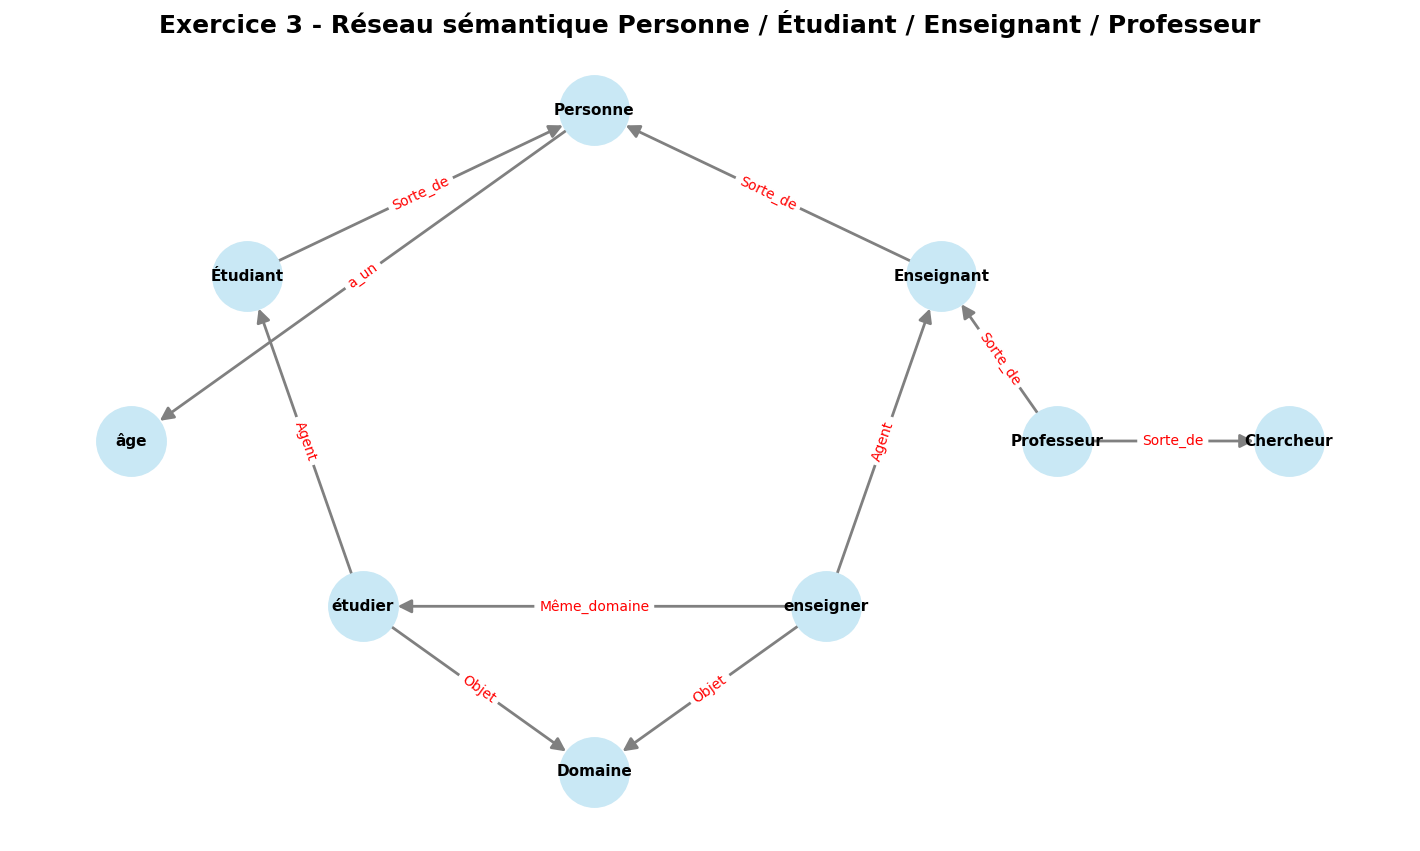

In [ ]:
def layout_G3(G):
    pos = {}
    pos["Personne"] = (0, 3)
    pos["Étudiant"] = (-3, 2)
    pos["Enseignant"] = (3, 2)
    pos["Professeur"] = (4, 1)
    pos["Chercheur"] = (6, 1)
    pos["étudier"] = (-2, 0)
    pos["enseigner"] = (2, 0)
    pos["Domaine"] = (0, -1)
    pos["âge"] = (-4, 1)

    return pos

def afficher_reseau_G3(G, titre):
    plt.figure(figsize=(14, 8))

    pos = layout_G3(G)

    nx.draw(
        G, pos,
        with_labels=True,
        node_color="#C9E8F5",
        node_size=2500,
        font_size=11,
        font_weight="bold",
        edge_color="gray",
        arrows=True,
        arrowsize=20,
        width=2
    )

    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels,
        font_color="red", font_size=10
    )

    plt.title(titre, fontsize=18, fontweight="bold")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

G3 = nx.DiGraph()

edges3 = [
    ("Personne", "âge", "a_un"),      
    ("Étudiant", "Personne", "Sorte_de"), 
    ("Professeur", "Enseignant", "Sorte_de"),
    ("Professeur", "Chercheur", "Sorte_de"),
    ("Enseignant", "Personne", "Sorte_de"),
    ("enseigner", "Domaine", "Objet"), 
    ("enseigner", "Enseignant", "Agent"),
    ("étudier", "Étudiant", "Agent"),   
    ("étudier", "Domaine", "Objet"),    
    ("enseigner", "étudier", "Même_domaine") 
]

for s, d, r in edges3:
    G3.add_edge(s, d, relation=r)
afficher_reseau_G3(G3, "Exercice 3 - Réseau sémantique Personne / Étudiant / Enseignant / Professeur")


# Exercice 4 : Propagation d’activation - Réseau Animal

**Énoncé :**  
On construit le réseau suivant :  
- Chien → est un → Animal  
- Chat → est un → Animal  
- Animal → est un → ÊtreVivant  
- Chien → lié à → Os  
- Chat → lié à → Lait  
- Os → type → Nourriture  

On active initialement le nœud **Chien** et on applique une **propagation d’activation** (niveau = 3, facteur = 0.5). 

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27696\1716987236.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


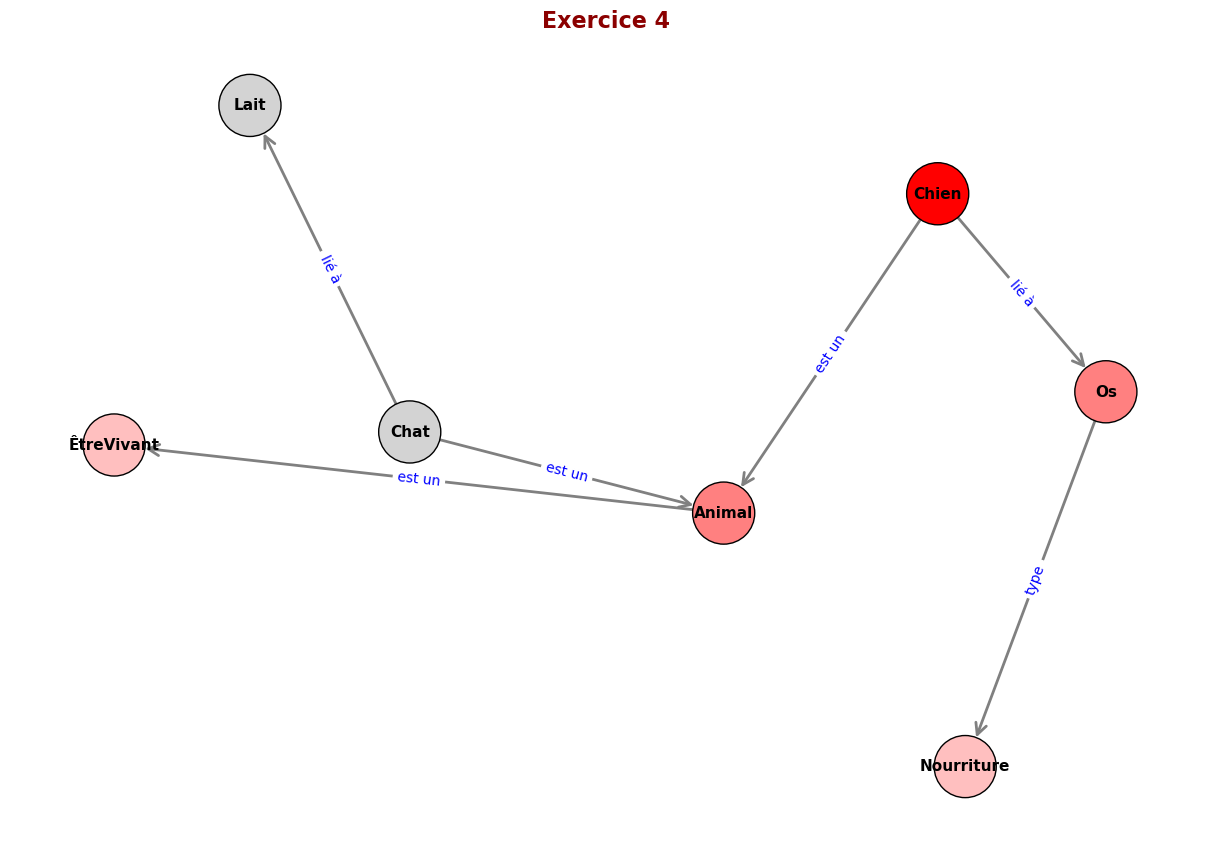

In [42]:
def afficher_reseau_activation(G, activations, titre):
    plt.figure(figsize=(12, 8))
    try:
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')
    except:
        pos = nx.spring_layout(G, seed=42, k=1.5)

    node_colors = []
    for n in G.nodes():
        a = activations.get(n, 0)
        if a == 0:
            node_colors.append("#D3D3D3")  
        else:
            node_colors.append((1, 1 - a, 1 - a))  

    nx.draw(
        G, pos,
        with_labels=True,
        node_size=2000,
        node_color=node_colors,
        font_size=11,
        font_weight="bold",
        arrows=True,
        arrowstyle="->",
        arrowsize=20,
        edge_color="gray",
        width=2,
        edgecolors="black" 
    )

    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="blue", font_size=10)

    plt.title(titre, fontsize=16, fontweight="bold", color="darkred")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

def propager_activation(G, noeud_initial, niveau_max=3, facteur=0.5):
    activations = {noeud_initial: 1.0}
    frontier = {noeud_initial}

    for niveau in range(1, niveau_max + 1):
        nouvelle_frontiere = set()
        for n in frontier:
            for voisin in G.successors(n):
                nouvelle_valeur = activations[n] * facteur
                if nouvelle_valeur > activations.get(voisin, 0):
                    activations[voisin] = nouvelle_valeur
                nouvelle_frontiere.add(voisin)
        frontier = nouvelle_frontiere

    return activations

G4 = nx.DiGraph()
edges4 = [
    ("Chien", "Animal", "est un"),
    ("Chat", "Animal", "est un"),
    ("Animal", "ÊtreVivant", "est un"),
    ("Chien", "Os", "lié à"),
    ("Chat", "Lait", "lié à"),
    ("Os", "Nourriture", "type")
]

for s, d, r in edges4:
    G4.add_edge(s, d, relation=r)

activation = propager_activation(G4, "Chien", niveau_max=3, facteur=0.5)
afficher_reseau_activation(G4, activation, "Exercice 4 ")


# Exercice 5 : Propriétés héritées des oiseaux

**Énoncé :**  
- Les oiseaux peuvent voler.  
- Les oiseaux nocturnes chassent la nuit.  
- Les hiboux sont des oiseaux nocturnes.  
- Les pingouins sont des oiseaux mais ne volent pas.  
- Les hiboux ne vivent pas dans l’eau.  

**Objectif :**  
Déterminer pour le Pingouin et le Hibou les propriétés héritées finales via le réseau sémantique et la propagation d’héritage.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27696\2942205057.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


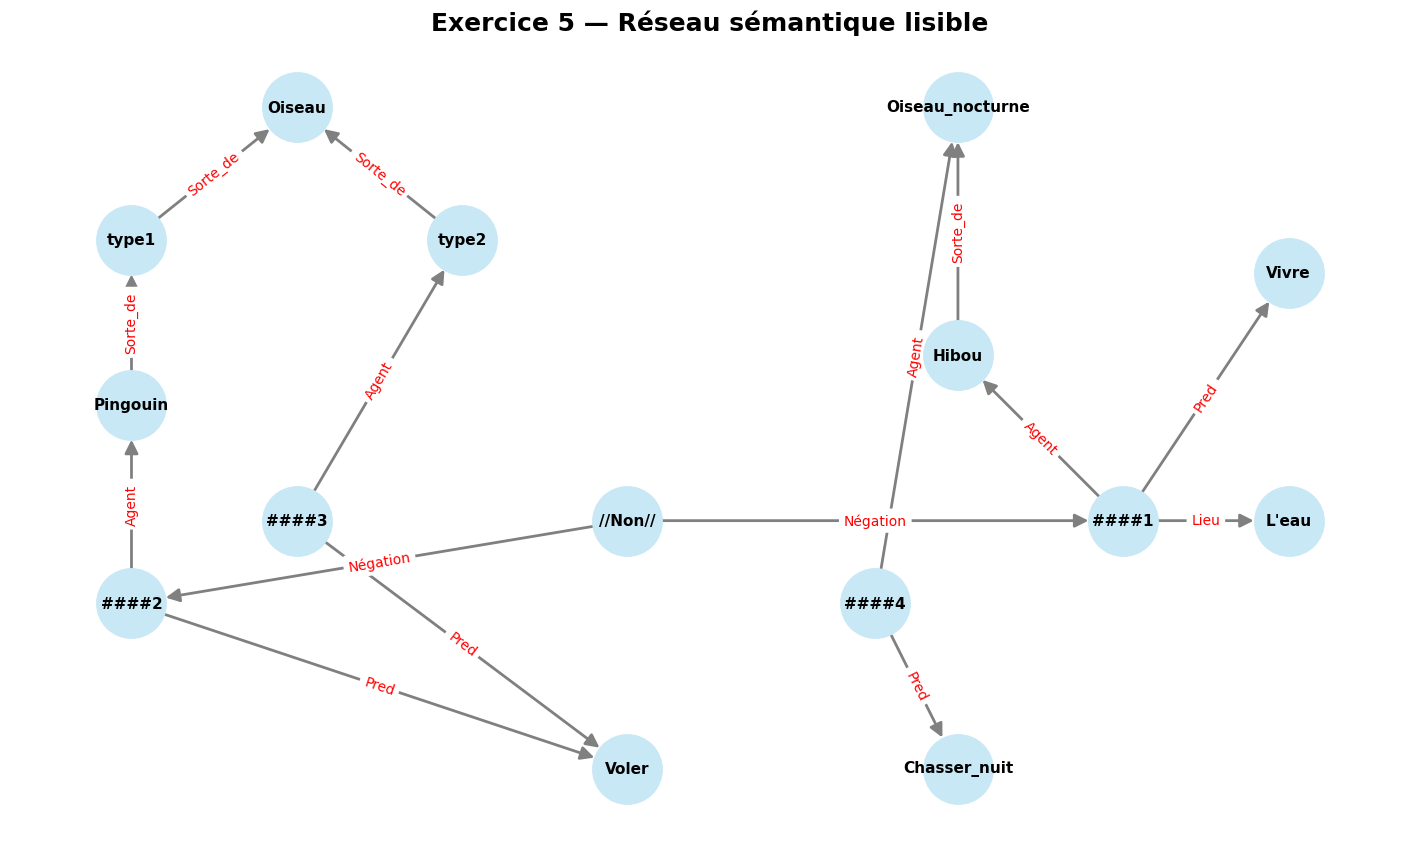

In [43]:
def layout_semantique(G):
    pos = {}

    pos["Oiseau"] = (-2, 2)
    pos["Oiseau_nocturne"] = (2, 2)
    pos["L'eau"] = (4, -0.5)

    pos["type1"] = (-3, 1.2)
    pos["type2"] = (-1, 1.2)

    pos["Pingouin"] = (-3, 0.2)
    pos["Hibou"] = (2, 0.5)

    pos["####3"] = (-2, -0.5)
    pos["####2"] = (-3, -1)
    pos["####1"] = (3, -0.5)
    pos["####4"] = (1.5, -1)

    pos["Voler"] = (0, -2)
    pos["Chasser_nuit"] = (2, -2)
    pos["Vivre"] = (4, 1)
    pos["//Non//"] = (0, -0.5)

    return pos


def afficher_reseau_semantique(G, titre):
    plt.figure(figsize=(14, 8))

    pos = layout_semantique(G)

    nx.draw(
        G, pos,
        with_labels=True,
        node_color="#C9E8F5",
        node_size=2500,
        font_size=11,
        font_weight="bold",
        edge_color="gray",
        arrows=True,
        arrowsize=20,
        width=2
    )

    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_color="red", font_size=10)

    plt.title(titre, fontsize=18, fontweight="bold")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

G5 = nx.DiGraph()

edges5 = [
    ("Hibou", "Oiseau_nocturne", "Sorte_de"),
    ("type1", "Oiseau", "Sorte_de"),
    ("type2", "Oiseau", "Sorte_de"),
    ("Pingouin", "type1", "Sorte_de"),

    ("####1", "Hibou", "Agent"),
    ("####1","Vivre",  "Pred"),
    ("####1","L'eau",  "Lieu"),
    ("//Non//", "####1", "Négation"),

    ("####2", "Pingouin", "Agent"),
    ("####2","Voler",  "Pred"),
    ("//Non//", "####2", "Négation"),

    ("####3", "type2", "Agent"),
    ("####3","Voler",  "Pred"),

    ("####4", "Oiseau_nocturne", "Agent"),
    ("####4","Chasser_nuit", "Pred")
]

for s, d, r in edges5:
    G5.add_edge(s, d, relation=r)

afficher_reseau_semantique(G5, "Exercice 5 — Réseau sémantique lisible")



# Exercice 6 : Réseau sémantique Étudiant / Ali

**Énoncé :**  
- (∀x) Étudiant(x) → Personne(x)  
- (∀x) Étudiant(x) → ¬Travailleur(x)  
- Étudiant(Ali)  

**Objectif :**  
Traduire ces assertions logiques en réseau sémantique et propager les relations pour déterminer les propriétés d’Ali.

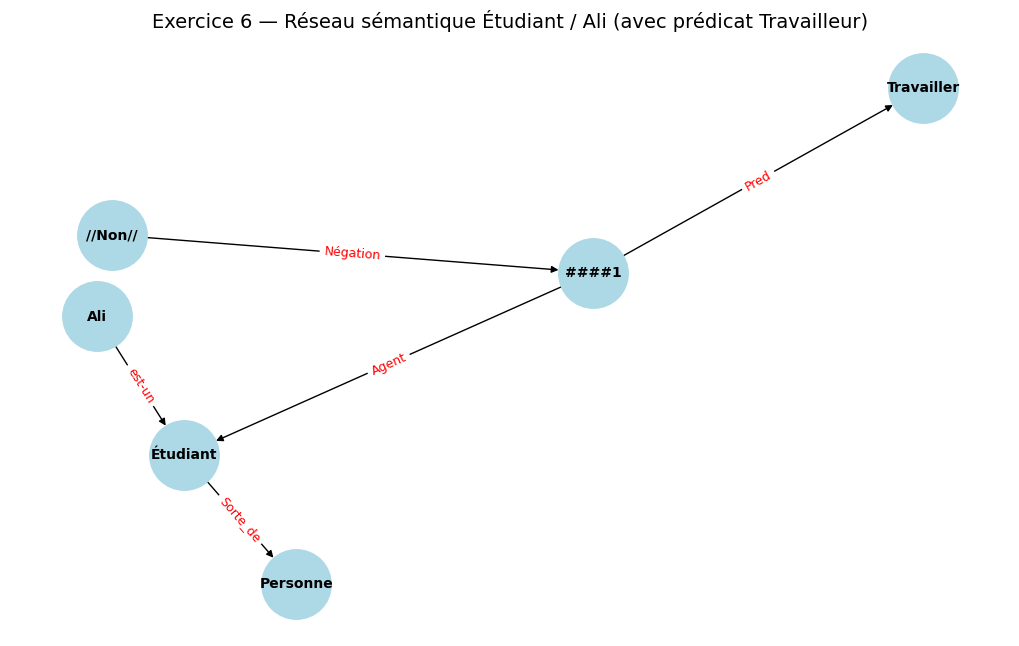

In [46]:

G6 = nx.DiGraph()
edges6 = [
    ("Étudiant", "Personne", "Sorte_de"),   
    ("//Non//", "####1", "Négation"),
    ("####1", "Travailler", "Pred"),
    ("####1", "Étudiant", "Agent"),
    ("Ali", "Étudiant", "est-un"),
]

for s, d, r in edges6:
    G6.add_edge(s, d, relation=r)

afficher_reseau(G6, "Exercice 6 — Réseau sémantique Étudiant / Ali (avec prédicat Travailleur)")


# Exercice 7 : Réseau médical - Détermination des maladies possibles

**Énoncé :**  
Dans un réseau médical simplifié :  
- Fièvre → symptôme → Maladie  
- Toux → symptôme → MaladieRespiratoire  
- Grippe → isa → MaladieRespiratoire  
- Grippe → hasSymptom → Fièvre, Toux  
- Pneumonie → isa → MaladieRespiratoire  
- Pneumonie → hasSymptom → Fièvre, DouleurPoitrine  

**Objectif :**  
Si un patient présente **fièvre + toux**, quelles maladies sont possibles ?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27696\2603141843.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


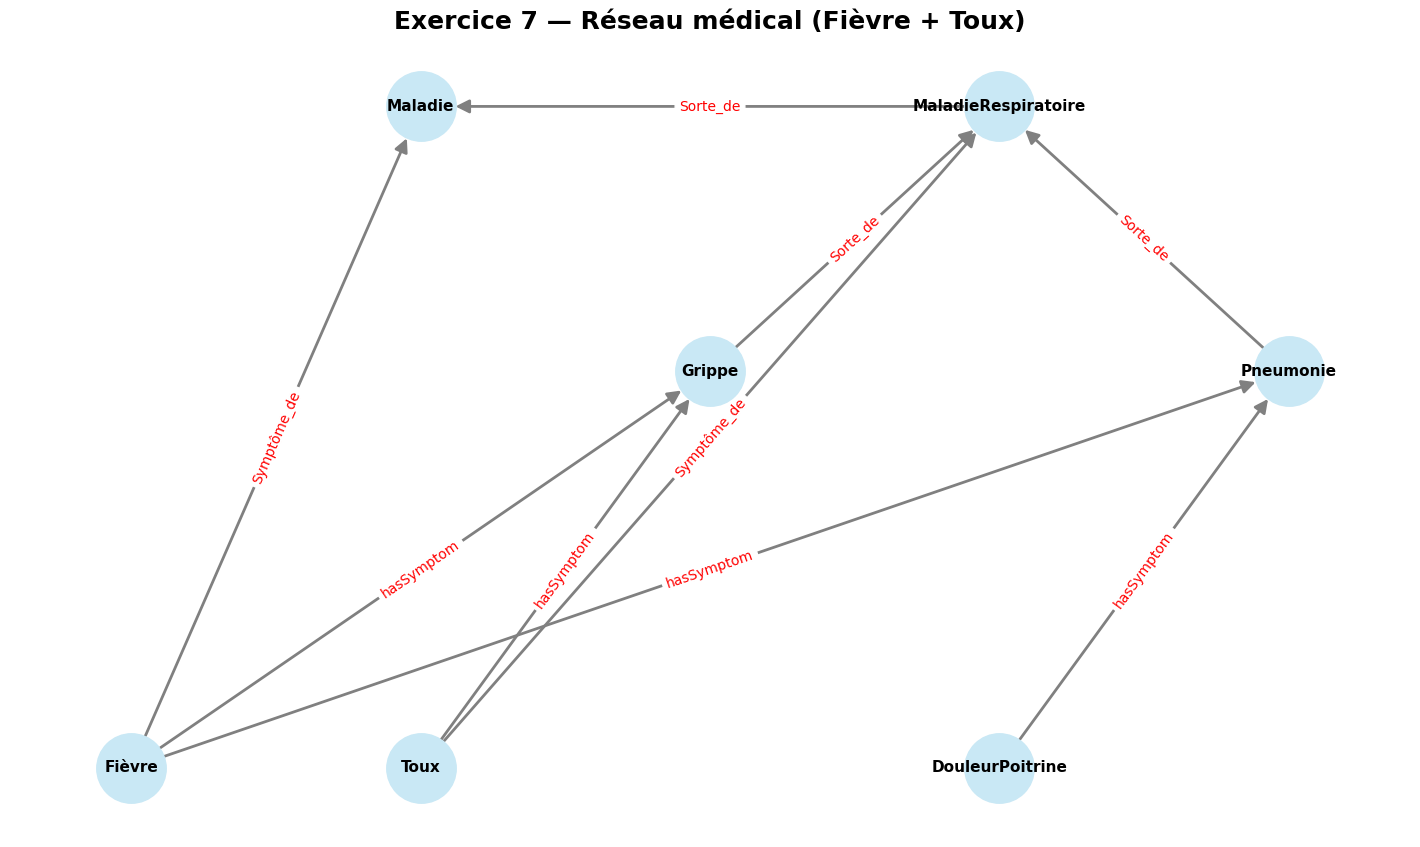

In [ ]:
def layout_G7(G):
    pos = {}
    pos["Maladie"] = (0, 3)
    pos["MaladieRespiratoire"] = (4, 3)
    pos["Grippe"] = (2, 2)
    pos["Pneumonie"] = (6, 2)
    pos["Fièvre"] = (-2, 0.5)
    pos["Toux"] = (0, 0.5)
    pos["DouleurPoitrine"] = (4, 0.5)

    return pos

def afficher_reseau_G7(G, titre):
    plt.figure(figsize=(14, 8))

    pos = layout_G7(G)

    nx.draw(
        G, pos,
        with_labels=True,
        node_color="#C9E8F5",
        node_size=2500,
        font_size=11,
        font_weight="bold",
        edge_color="gray",
        arrows=True,
        arrowsize=20,
        width=2
    )

    edge_labels = nx.get_edge_attributes(G, "relation")
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels=edge_labels,
        font_color="red",
        font_size=10
    )

    plt.title(titre, fontsize=18, fontweight="bold")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

G7 = nx.DiGraph()
edges7 = [
    ("Fièvre", "Maladie", "hasSymptom"),
    ("Toux", "MaladieRespiratoire", "hasSymptom"),

    ("MaladieRespiratoire", "Maladie", "Sorte_de"),
    ("Grippe", "MaladieRespiratoire", "Sorte_de"),
    ("Pneumonie", "MaladieRespiratoire", "Sorte_de"),

    ("Fièvre", "Grippe", "hasSymptom"),
    ("Toux", "Grippe", "hasSymptom"),

    ("Fièvre", "Pneumonie", "hasSymptom"),
    ("DouleurPoitrine", "Pneumonie", "hasSymptom")
]

for s, d, r in edges7:
    G7.add_edge(s, d, relation=r)

afficher_reseau_G7(G7, "Exercice 7 — Réseau médical (Fièvre + Toux)")
